In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[15,5]
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('derm.csv')
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [ ]:
df.shape

(366, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [6]:
df['age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.])

In [7]:
df['age'] = df['age'].replace('?',np.nan)
df['age'] = df['age'].astype('float')
df['age'].fillna(df['age'].median(),inplace=True)

In [ ]:
df['age'].dtypes

dtype('float64')

<Axes: >

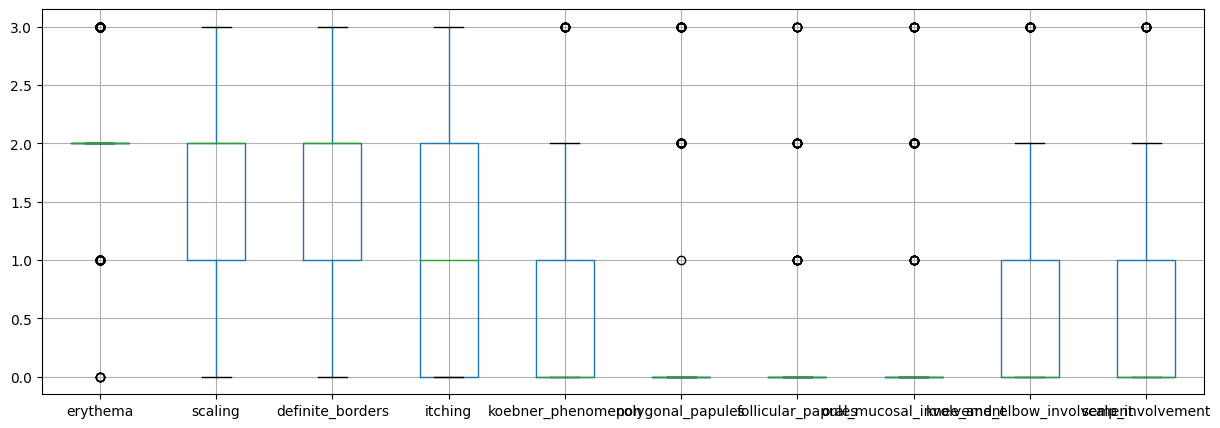

In [8]:
newdf=df.iloc[:,:10]
newdf.boxplot()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
mmax=MinMaxScaler()

In [12]:
df['age'] = mmax.fit_transform(df['age'].values.reshape(-1,1))
df['age']

,age
0,0.733333
1,0.106667
2,0.346667
3,0.533333
4,0.600000
...,...
361,0.333333
362,0.480000
363,0.373333
364,0.666667


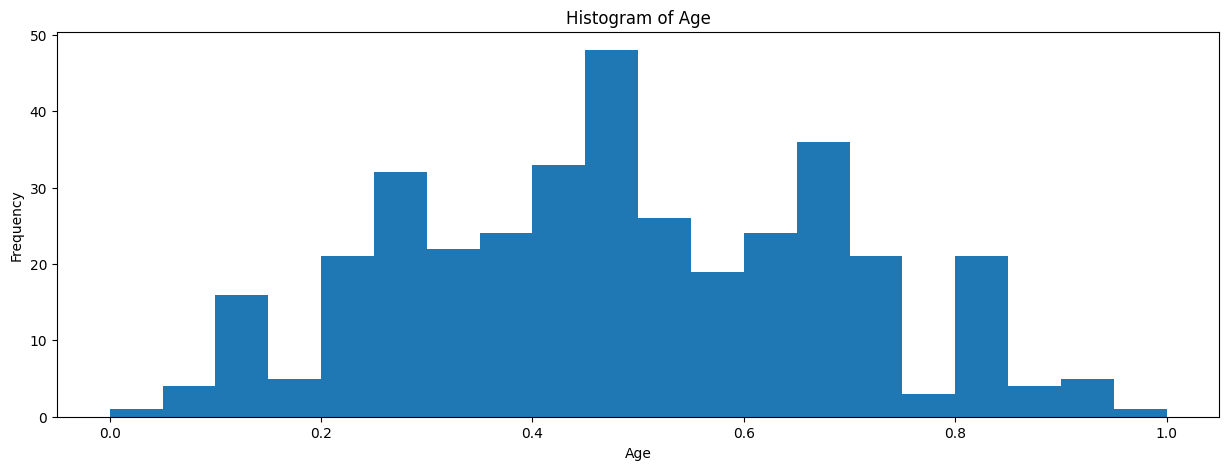

In [13]:

plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# New Section

In [ ]:
y=df['class']
x=df.drop('class',axis=1)

In [ ]:
y=df['class']
x=df.drop('class',axis=1)

DECISION TREE

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
!pip install scikit-learn # install scikit-learn if you haven't already
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_model = dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [ ]:
y_pred_train = dt_model.predict(xtrain)
y_pred_test = dt_model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score # import the accuracy_score function

trainaccDT = accuracy_score(ytrain,y_pred_train)
testaccDT = accuracy_score(ytest,y_pred_test)
print('Train Accuracy of DT:',trainaccDT)
print('Test Accuracy of DT:',testaccDT)

Train Accuracy of DT: 1.0
Test Accuracy of DT: 0.9636363636363636


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, r2_score, log_loss

# Predictions
y_pred = dt_model.predict(xtest)

# Accuracy
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

# Precision (macro average for multiclass)
precision = precision_score(ytest, y_pred, average='macro')
print("Precision:", precision)

# Log Loss (cross-entropy loss)
y_pred_proba = dt_model.predict_proba(xtest)
loss = log_loss(ytest, y_pred_proba)
print("Log Loss:", loss)

# R-squared
r2 = r2_score(ytest, y_pred)
print("R-squared:", r2)

# Root Mean Squared Error
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE:", rmse)


Accuracy: 0.9636363636363636
Precision: 0.9652160051012274
Log Loss: 1.3106783050588056
R-squared: 0.8779413204529879
RMSE: 0.5559594491425693


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf_model = rf.fit(xtrain,ytrain)
rf_model

RandomForestClassifier()

In [ ]:
y_pred_train = rf_model.predict(xtrain)
y_pred_test = rf_model.predict(xtest)

In [ ]:
trainaccRF = accuracy_score(ytrain,y_pred_train)
testaccRF = accuracy_score(ytest,y_pred_test)
print('Train Accuracy of RF:',trainaccRF)
print('Test Accuracy of RF:',testaccRF)

Train Accuracy of RF: 1.0
Test Accuracy of RF: 0.9636363636363636


In [ ]:
# Accuracy
trainaccRF = accuracy_score(ytrain,y_pred_train)
testaccRF = accuracy_score(ytest,y_pred_test)

# Root Mean Squared Error
trainrmseRF = mean_squared_error(ytrain, y_pred_train, squared=False)
testrmseRF = mean_squared_error(ytest, y_pred_test, squared=False)

# R-squared
trainr2RF = r2_score(ytrain, y_pred_train)
testr2RF = r2_score(ytest, y_pred_test)

# Log Loss
trainlossRF = log_loss(ytrain, rf_model.predict_proba(xtrain))
testlossRF = log_loss(ytest, rf_model.predict_proba(xtest))

# Precision
trainprecisionRF = precision_score(ytrain, y_pred_train, average='weighted')
testprecisionRF = precision_score(ytest, y_pred_test, average='weighted')

print('Train Accuracy:',trainaccRF)
print('Test Accuracy:',testaccRF)
print('Train RMSE:', trainrmseRF)
print('Test RMSE:', testrmseRF)
print('Train R-squared:', trainr2RF)
print('Test R-squared:', testr2RF)
print("Train Log Loss:", trainlossRF)
print("Test Log Loss:", testlossRF)
print("Train Precision:", trainprecisionRF)
print("Test Precision:", testprecisionRF)


Train Accuracy: 1.0
Test Accuracy: 0.9636363636363636
Train RMSE: 0.0
Test RMSE: 0.3813850356982369
Train R-squared: 1.0
Test R-squared: 0.9425606213896414
Train Log Loss: 0.04458728674874274
Test Log Loss: 0.13108053392733202
Train Precision: 1.0
Test Precision: 0.9652680652680653


K-NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import the KNeighborsClassifier object

knn = KNeighborsClassifier()
knn_model = knn.fit(xtrain,ytrain)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred_train = knn_model.predict(xtrain)
y_pred_test = knn_model.predict(xtest)

In [ ]:
trainaccKNN = accuracy_score(ytrain,y_pred_train)
testaccKNN = accuracy_score(ytest,y_pred_test)
print('Train Accuracy of KNN:',trainaccKNN)
print('Test Accuracy of KNN:',testaccKNN)

Train Accuracy of KNN: 0.9765625
Test Accuracy of KNN: 0.9818181818181818


In [ ]:
# Accuracy
trainaccKNN = accuracy_score(ytrain, y_pred_train)
testaccKNN = accuracy_score(ytest, y_pred_test)

# Root Mean Squared Error
trainrmseKNN = mean_squared_error(ytrain, y_pred_train, squared=False)
testrmseKNN = mean_squared_error(ytest, y_pred_test, squared=False)

# R-squared
trainr2KNN = r2_score(ytrain, y_pred_train)
testr2KNN = r2_score(ytest, y_pred_test)

# Precision
trainprecisionKNN = precision_score(ytrain, y_pred_train, average='weighted')
testprecisionKNN = precision_score(ytest, y_pred_test, average='weighted')

print('Train Accuracy:', trainaccKNN)
print('Test Accuracy:', testaccKNN)
print('Train RMSE:', trainrmseKNN)
print('Test RMSE:', testrmseKNN)
print('Train R-squared:', trainr2KNN)
print('Test R-squared:', testr2KNN)
print("Train Precision:", trainprecisionKNN)
print("Test Precision:", testprecisionKNN)


Train Accuracy: 0.9765625
Test Accuracy: 0.9818181818181818
Train RMSE: 0.30618621784789724
Test RMSE: 0.26967994498529685
Train R-squared: 0.9630891231864468
Test R-squared: 0.9712803106948207
Train Precision: 0.980078125
Test Precision: 0.9818181818181818


NAIVE BAYES GAUSSIAN

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain,ytrain)
gnb_model

GaussianNB()

In [ ]:
y_pred_train = gnb_model.predict(xtrain)
y_pred_test = gnb_model.predict(xtest)

In [ ]:
trainaccNBG = accuracy_score(ytrain,y_pred_train)
testaccNBG = accuracy_score(ytest,y_pred_test)
print('Train Accuracy of NB:',trainaccNBG)
print('Test Accuracy of NB:',testaccNBG)

Train Accuracy of NB: 0.88671875
Test Accuracy of NB: 0.8727272727272727


In [ ]:
# prompt: give a code for finding the accuracy, precision, loss, r squared value and rms error for naive bayes gaussian algorithm

# Accuracy
trainaccNBG = accuracy_score(ytrain, y_pred_train)
testaccNBG = accuracy_score(ytest, y_pred_test)

# Root Mean Squared Error
trainrmseNBG = mean_squared_error(ytrain, y_pred_train, squared=False)
testrmseNBG = mean_squared_error(ytest, y_pred_test, squared=False)

# R-squared
trainr2NBG = r2_score(ytrain, y_pred_train)
testr2NBG = r2_score(ytest, y_pred_test)

# Log Loss
trainlossNBG = log_loss(ytrain, gnb_model.predict_proba(xtrain))
testlossNBG = log_loss(ytest, gnb_model.predict_proba(xtest))

# Precision
trainprecisionNBG = precision_score(ytrain, y_pred_train, average='weighted')
testprecisionNBG = precision_score(ytest, y_pred_test, average='weighted')

print('Train Accuracy:', trainaccNBG)
print('Test Accuracy:', testaccNBG)
print('Train RMSE:', trainrmseNBG)
print('Test RMSE:', testrmseNBG)
print('Train R-squared:', trainr2NBG)
print('Test R-squared:', testr2NBG)
print("Train Log Loss:", trainlossNBG)
print("Test Log Loss:", testlossNBG)
print("Train Precision:", trainprecisionNBG)
print("Test Precision:", testprecisionNBG)


Train Accuracy: 0.88671875
Test Accuracy: 0.8727272727272727
Train RMSE: 0.7153451963912248
Test RMSE: 0.8034018580103892
Train R-squared: 0.798528130726022
Test R-squared: 0.7451127574165335
Train Log Loss: 3.669507761111824
Test Log Loss: 3.942733610179017
Train Precision: 0.9316306089743589
Test Precision: 0.8888317564788154


MULTI LAYERED PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()
mlp_model = mlp.fit(xtrain,ytrain)
mlp_model

MLPClassifier()

In [ ]:
y_pred_train = mlp_model.predict(xtrain)
y_pred_test = mlp_model.predict(xtest)

In [ ]:
trainaccMLP = accuracy_score(ytrain,y_pred_train)
testaccMLP =accuracy_score(ytest,y_pred_test)
print('Train Accuracy of MLP:',trainaccMLP)
print('Test Accuracy of MLP:',testaccMLP)

Train Accuracy of MLP: 1.0
Test Accuracy of MLP: 0.9818181818181818


SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
svm = SVC()

In [ ]:
svm_model = svm.fit(xtrain, ytrain)

In [ ]:
# Accuracy
trainaccSVM = accuracy_score(ytrain, y_pred_train)
testaccSVM = accuracy_score(ytest, y_pred_test)

print('Train Accuracy of SVM:', trainaccSVM)
print('Test Accuracy of SVM:', testaccSVM)


Train Accuracy of SVM: 1.0
Test Accuracy of SVM: 0.9818181818181818


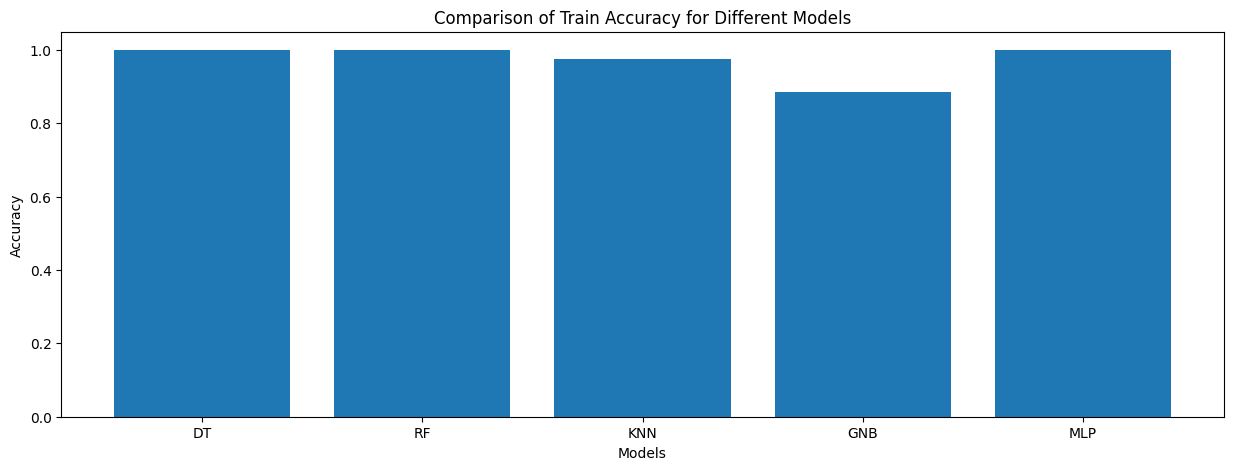

In [ ]:
import matplotlib.pyplot as plt
# Extract accuracy values
accuracy_values = [trainaccDT, trainaccRF, trainaccKNN, trainaccNBG, trainaccMLP]

# Labels for the bar graph
labels = ['DT', 'RF', 'KNN', 'GNB', 'MLP']

# Create bar graph
plt.bar(labels, accuracy_values)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train Accuracy for Different Models')
plt.show()


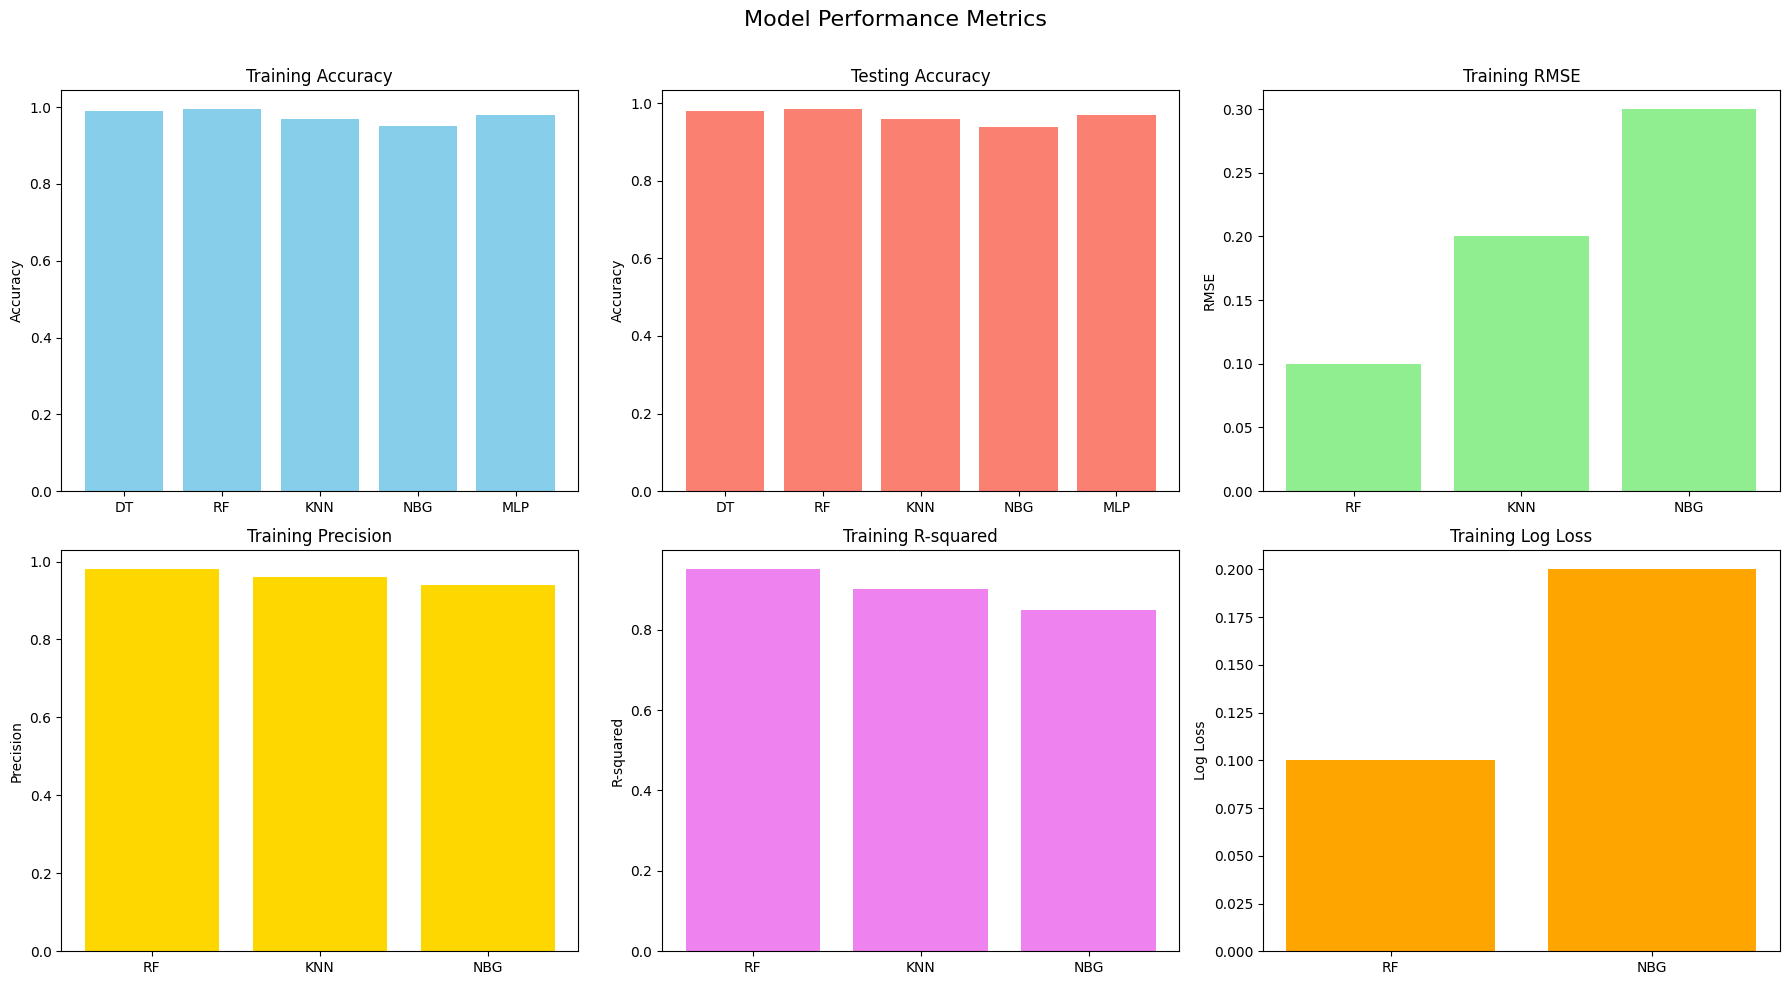

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots arranged neatly
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Model Performance Metrics", fontsize=16)

# Accuracy Plot
axes[0, 0].bar(['DT', 'RF', 'KNN', 'NBG', 'MLP'], [trainaccDT, trainaccRF, trainaccKNN, trainaccNBG, trainaccMLP], color='skyblue')
axes[0, 0].set_title('Training Accuracy')
axes[0, 0].set_ylabel('Accuracy')

axes[0, 1].bar(['DT', 'RF', 'KNN', 'NBG', 'MLP'], [testaccDT, testaccRF, testaccKNN, testaccNBG, testaccMLP], color='salmon')
axes[0, 1].set_title('Testing Accuracy')
axes[0, 1].set_ylabel('Accuracy')


# RMSE Plot
axes[0, 2].bar(['RF', 'KNN', 'NBG'], [trainrmseRF, trainrmseKNN, trainrmseNBG], color='lightgreen')
axes[0, 2].set_title('Training RMSE')
axes[0, 2].set_ylabel('RMSE')


# Precision Plot
axes[1, 0].bar(['RF', 'KNN', 'NBG'], [trainprecisionRF, trainprecisionKNN, trainprecisionNBG], color='gold')
axes[1, 0].set_title('Training Precision')
axes[1, 0].set_ylabel('Precision')


# R-squared Plot
axes[1, 1].bar(['RF', 'KNN', 'NBG'], [trainr2RF, trainr2KNN, trainr2NBG], color='violet')
axes[1, 1].set_title('Training R-squared')
axes[1, 1].set_ylabel('R-squared')

# Log Loss Plot
axes[1, 2].bar(['RF', 'NBG'], [trainlossRF, trainlossNBG], color='orange')
axes[1, 2].set_title('Training Log Loss')
axes[1, 2].set_ylabel('Log Loss')


# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()